#### @Author Marktus A Atanga
#### Johns Hopkins University
#### Algorithms for Data Scientists
#### Programming assignment 1
#### Iris data set

In [30]:
#This outputs the notebook file in a directory of your choice 
%notebook  "C:/Users/maa5m/Desktop/2018_school/ENG685.621.81.FA19_Algorithms_for_Data_Science/Programming_HW/src/IrisData_Analysis.ipynb"

In [42]:
%matplotlib inline
import pandas as pd 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#### use pandas to read Iris data from data directory. The data would be in a dataframe call IrisData

In [33]:
IrisData = pd.read_csv("C:/Users/maa5m/Desktop/2018_school/ENG685.621.81.FA19_Algorithms_for_Data_Science/Programming_HW/Inputs/Irisdata.csv" )

#### visualize features with matplotlib scatter plot function. This function accepts plant class (setosa, versicolor, virginica) 
#### and the features you wish to see (sepallength, sepalwidth, petallength, petalwidth)

select plant class option: setosa, versicolor, virginica
setosa
select any two features one at a time:sepallength, sepalwidth, petallength, petalwidth
petallength
sepalwidth
How would you like to see features? 1. feature to feature relation; 2. feature scatter
2


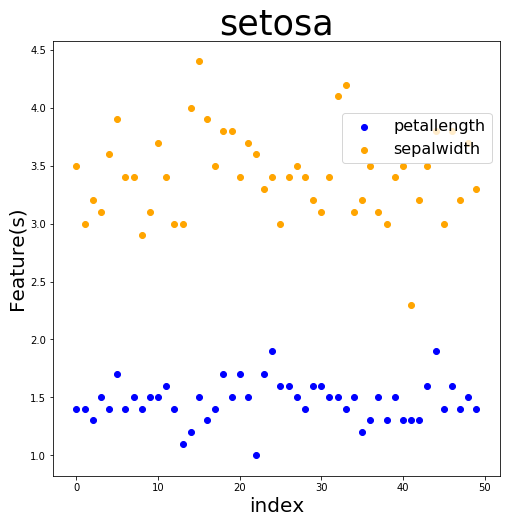

In [60]:
def scatterplots(data):
    """
    This function gives options to view data in two ways. You would to select two features
    1. Feature to feature relation ship
    2. Feature scatter distribution.
    """
    print('select plant class option: setosa, versicolor, virginica')
    plantClass = input()
    
    print('select any two features one at a time:sepallength, sepalwidth, petallength, petalwidth')
    feature1 = input()
    feature2 = input()
    
    plt.figure(figsize=(8,8))
    
    if(plantClass == 'setosa'):
        selectClass = data[data['class']=='Iris-setosa']      
    elif(plantClass == 'versicolor'):
        selectClass = data[data['class']=='Iris-versicolor']                 
    elif(plantClass == 'virginica'):
        selectClass = data[data['class']=='Iris-virginica'] 
        
        
    print('How would you like to see features?'+" 1. feature to feature relation; 2. feature scatter")
    selectplot = input()
    if(selectplot=='1'):
        plt.scatter(selectClass[feature1], selectClass[feature2], label=feature2, color='green')
        plt.xlabel(str(feature1), fontsize = 20)
        plt.ylabel(str(feature2), fontsize = 20)
        plt.title(plantClass, fontsize = 35)
        
    else:
        plt.scatter(selectClass.index, selectClass[feature1], label=feature1, color='blue')
        plt.scatter(selectClass.index, selectClass[feature2], label=feature2, color='orange')
        plt.xlabel('index', fontsize = 20)
        plt.ylabel('Feature(s)', fontsize = 20)
        plt.title(plantClass, fontsize = 35)
        plt.legend(bbox_to_anchor=(0.0, 0.7, 1, .102), fontsize = 16)

    plt.show()

#call the scatterplots function to make plots of features
scatterplots(IrisData)

#### Box and whisker plots to show the shape of the data distribustions
#### The function below requires user to select the plant class to show plot

select plant class see box plot
setosa


<Figure size 144x144 with 0 Axes>

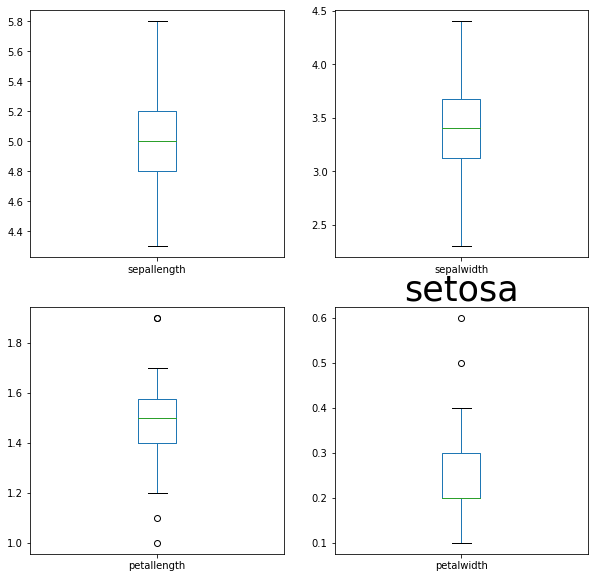

In [56]:
def boxplots(data):
    
    print('select plant class see box plot')
    plantClass = input()
    
    plt.figure(figsize=(8,8))
    if(plantClass == 'setosa'):
        setosa = data[data['class']=='Iris-setosa'] 
        setosa.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
        
    elif(plantClass == 'versicolor'):
        versicolor = data[data['class']=='Iris-versicolor'] 
        versicolor.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
        
    elif(plantClass == 'virginica'):
        virginica = data[data['class']=='Iris-virginica'] 
        virginica.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
    
    plt.title(plantClass, fontsize = 35)
    plt.savefig("C:/Users/maa5m/Desktop/2018_school/ENG685.621.81.FA19_Algorithms_for_Data_Science/Programming_HW/Outputs/setosaboxplot.png")
    plt.show()     

#call the boxplots function to make plots of features
boxplots(IrisData)

#### This is the divide andd conquer function. After the data is fully divided, it calls mergeData function which merges the data by sorting.

In [79]:
def divideAndConquer(data):
    """
    This is the divide andd conquer function. After the data is fully 
    divided, it merges them by sorting.
    """
    n = len(data)
    if (n <2):
        return data
    middle = n//2 #midpoint to divide data    
    return mergeData(divideAndConquer(data[:middle]), divideAndConquer(data[middle:])) 

def mergeData(leftData, rightData): 
    """
    combine the sorted left and right data from divide and conquer 
    into data.
    """
    L_index = R_index = 0 
    
    data = []  #initialize to hold data
    
    while(L_index < len(leftData) and R_index < len(rightData)):
        if (leftData[L_index] <= rightData[R_index]):
            data.append(leftData[L_index])
            L_index += 1
        else:
            data.append(rightData[R_index])         
            R_index += 1  
            
    data.extend(leftData[L_index:]) #copy everything left in the leftdata
    data.extend(rightData[R_index:]) #copy everything left in the rightdata
    
    return data

def driver(inputData, output_dir):
    """
    The driver function receives the input dataframe
    calls the divideAndConquer function to sort each column of the dataframe
    and outputs a csv file of the sorted data
    @return sorted dataframe.
    """
    sort = inputData.apply(lambda col: pd.Series(divideAndConquer(list(col))), axis=0)    
    sort.to_csv(output_dir+"/sorted_data.csv", index=False)
    return sort

#### Divide Iris data to plant classes and sort each class 

In [80]:
setosa = IrisData[IrisData['class']=='Iris-setosa'] 
versicolor = IrisData[IrisData['class']=='Iris-versicolor'] 
virginica = IrisData[IrisData['class']=='Iris-virginica'] 

#remove the class column from the data
del setosa['class'] 
del versicolor['class']
del virginica['class']

#### Choose any plant class to sort  and provide directory to output sorted data. You can also sort the full Iris data set 

In [81]:
ouput_dir = "C:/Users/maa5m/Desktop/2018_school/ENG685.621.81.FA19_Algorithms_for_Data_Science/Programming_HW/Outputs"
sorted_data = driver(IrisData, ouput_dir)

In [72]:
sorted_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,4.3,2.0,1.0,0.1,Iris-setosa
1,4.4,2.2,1.1,0.1,Iris-setosa
2,4.4,2.2,1.2,0.1,Iris-setosa
3,4.4,2.2,1.2,0.1,Iris-setosa
4,4.5,2.3,1.3,0.1,Iris-setosa
...,...,...,...,...,...
145,7.7,3.9,6.4,2.4,Iris-virginica
146,7.7,4.0,6.6,2.4,Iris-virginica
147,7.7,4.1,6.7,2.5,Iris-virginica
148,7.7,4.2,6.7,2.5,Iris-virginica
